In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:

SPAM_PATH = os.path.join("datasets", "spam")
def load_spam_data(spam_path=SPAM_PATH):
    csv_path = os.path.join(spam_path, "spam.csv")
    return pd.read_csv(csv_path)


In [4]:
spam = pd.read_csv("./datasets/spam/spam.csv", encoding = "ISO-8859-1", engine='python')

In [5]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
spam.drop(spam.columns[[2,3,4]], axis = 1, inplace=True)

In [7]:
spam["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [8]:
spam.rename(columns={'v1':'Label', 'v2':'Text'}, inplace=True)

In [9]:
spam['Target'] = spam['Label'].map({'ham': 1, 'spam': 0})

In [10]:
spam = spam[['Text', 'Label', 'Target']]

In [11]:
clean_spam = spam

In [12]:
clean_spam.Text = clean_spam.Text.apply(lambda x: x.lower())

In [13]:
clean_spam.Text = clean_spam.Text.apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))

In [14]:
clean_spam.head()

,Text,Label,Target
0,go until jurong point crazy available only in ...,ham,1
1,ok lar joking wif u oni,ham,1
2,free entry in 2 a wkly comp to win fa cup fina...,spam,0
3,u dun say so early hor u c already then say,ham,1
4,nah i dont think he goes to usf he lives aroun...,ham,1


In [15]:
vectorizer = TfidfVectorizer("english")

In [16]:
X = vectorizer.fit_transform(clean_spam['Text'])

In [17]:
y = clean_spam['Target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
log_clf = LogisticRegression(random_state=42)
score1 = cross_val_score(log_clf, X_train, y_train, cv=3, verbose=3)
score1.mean()


[CV]  ................................................................
[CV] ....................... , score=0.9475100942126514, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.9434724091520862, total=   0.0s
[CV]  ................................................................
[CV] ........................ , score=0.934006734006734, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


0.9416630791238237

In [20]:
from sklearn.metrics import precision_score, recall_score

log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train, y_train)

y_pred = log_clf.predict(X_test)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 95.26%
Recall: 100.00%


In [26]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
score2 = cross_val_score(sgd_clf, X_train, y_train, cv=3, verbose=3)
score2.mean()

[CV]  ................................................................
[CV] ....................... , score=0.9818304172274562, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.9784656796769852, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.9750841750841751, total=   0.0s


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will

0.9784600906628721

In [27]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 97.67%
Recall: 99.79%


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/s

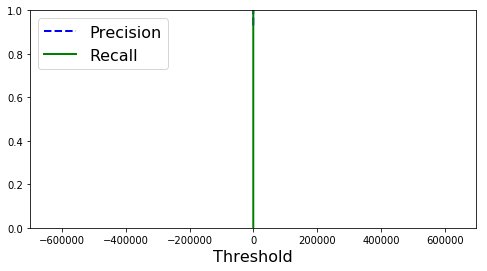

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()